# SMS Spam Detection

## Basic import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initial data visualization and cleaning

In [2]:
df_sms_data = pd.read_csv("sms_data.csv",encoding='latin-1')
display(df_sms_data.head())

df_sms_data = df_sms_data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df_sms_data = df_sms_data.rename(columns={"v1":"label","v2":"sms"})
display(df_sms_data.head())

df_sms_data['length'] = df_sms_data['sms'].apply(len)
display(df_sms_data.head())



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [3]:
print("Number of SMS:")
display(len(df_sms_data))

print("\nLabel values counts:")
display(df_sms_data.label.value_counts())

print("\nLabel Description:")
display( df_sms_data['label'].describe())

print("\nSMS Description:")
display(df_sms_data['sms'].describe())

print("\nLength Description:")
display(df_sms_data['length'].describe())


Number of SMS:


5572


Label values counts:


label
ham     4825
spam     747
Name: count, dtype: int64


Label Description:


count     5572
unique       2
top        ham
freq      4825
Name: label, dtype: object


SMS Description:


count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: sms, dtype: object


Length Description:


count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

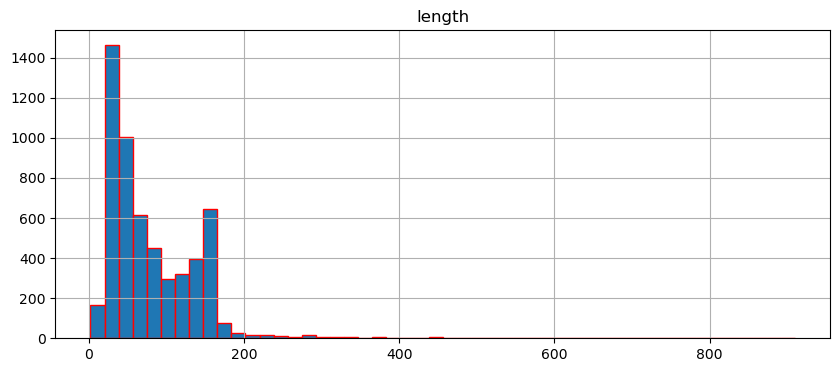

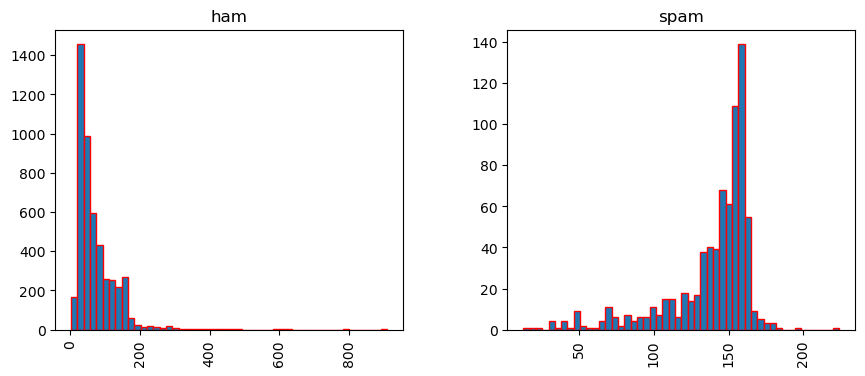

In [4]:
%matplotlib inline

df_sms_data.hist(column='length', bins = 50 , figsize=(10,4), edgecolor = 'red');
df_sms_data.hist(column='length', by='label', bins=50, figsize= (10,4), edgecolor = 'red');

In [5]:
df_sms_data.loc[:,'label'] =  df_sms_data.label.map({'ham':0, 'spam':1})
df_sms_data.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Bag of words preprocessing

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df_sms_data['sms'], df_sms_data['label'], random_state=1) # Use this to get always the same result from the split
X_train, X_test, y_train, y_test = train_test_split(df_sms_data['sms'], df_sms_data['label'])
y_train = y_train.astype('int')
y_test = y_test.astype('int')

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)



## Naive Bayes solution

In [7]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [8]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
predictions = naive_bayes.predict(testing_data)


## Result evaluation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.990667623833453
Precision score: 0.9781420765027322
Recall score: 0.9521276595744681
F1 score: 0.9649595687331537


## Hardcoded test

In [10]:
hardcoded_spam = "You want to win money now, come and join us now. Call 0800 169 6031 now and claim your reward in cash."
hardcoded_ham = "Hello, I am fine. How are you? I've been looking forward to meet you."

hardcoded_spam = count_vector.transform([hardcoded_spam]).toarray()
hardcoded_ham = count_vector.transform([hardcoded_ham]).toarray()


print("Spam" if naive_bayes.predict(hardcoded_spam) == 1 else "Ham") #This should be Spam
print("Spam" if naive_bayes.predict(hardcoded_ham) == 1 else "Ham") #This should be Ham

Spam
Ham
